In [1]:
import skie
import numpy as np
import pandas as pd
import pylab as pl

%pylab inline

Populating the interactive namespace from numpy and matplotlib


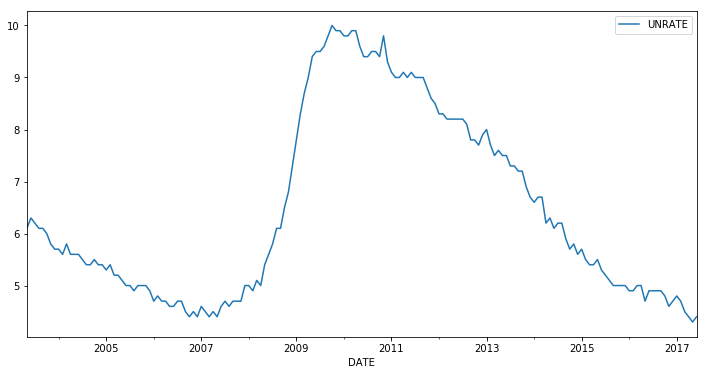

In [2]:
unrate_df = pd.read_csv("UNRATE.csv", index_col=0, parse_dates=[0]).tail(170)
unrate_df.plot(figsize=(12,6))

In [3]:
unrate_loglinear = skie.LogLinearEntropyMin()
unrate_rt = skie.RelTime(min(unrate_df.index))
unrate_df["date"] = unrate_rt.transform(unrate_df.index)
unrate_df['unrate_loglinear'] = unrate_loglinear.fit_transform(unrate_df.UNRATE, unrate_df.date, alpha_delta=0.001, n_bins = 40, method='brute')
print("Alpha: " + str(np.round(unrate_loglinear.alpha,2)*100) + "%")

Alpha: -9.0%


Transition Centres:
2008-09-12 01:12:44.582400
2014-04-09 06:13:32.073600
Shock Width:
-0.41
0.33
Shock Magnitude:
1.0
0.0


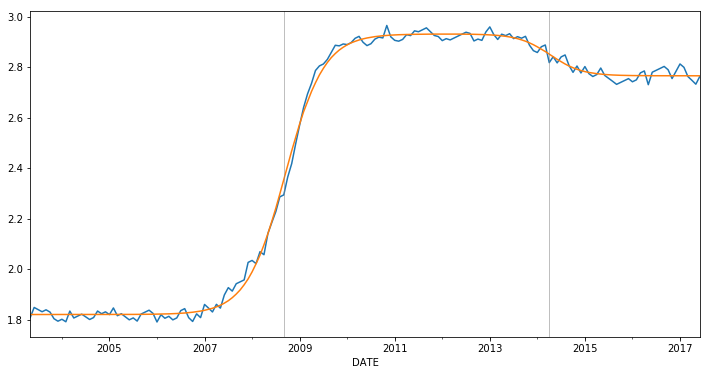

In [4]:
guesses = list()
guesses.append([1.0,-0.2, unrate_rt.transform("2008-1-1")])
guesses.append([0.1,0.1,unrate_rt.transform("2014-1-1")])

unrate_loglinear_die = skie.DynamicIE()
unrate_loglinear_die.fit(unrate_df.date, unrate_df["unrate_loglinear"].apply(np.exp), eq=False, guesses=guesses)

unrate_df['unrate_loglinear'].plot()
unrate_df['unrate_loglinear_fit'] = np.log(unrate_loglinear_die.predict(unrate_df.date, unrate_df["unrate_loglinear"].apply(np.exp)))
unrate_df['unrate_loglinear_fit'].plot(figsize=(12,6))

print("Transition Centres:")
for t in unrate_loglinear_die.results['transition']:
    time = unrate_rt.inverse_transform(t)
    print(str(time))
    pl.axvline(time, color='0.5', linewidth=0.5)

print("Shock Width:")
for w in unrate_loglinear_die.results['width']:
    print(np.round(w,2))

print("Shock Magnitude:")
for m in unrate_loglinear_die.results['magnitude']:
    print(np.round(m))

Transition Centres:
2008-09-12 01:12:44.582400
2014-04-09 06:13:32.073600
Shock Width:
-0.41
0.33
Shock Magnitude:
1.0
0.0


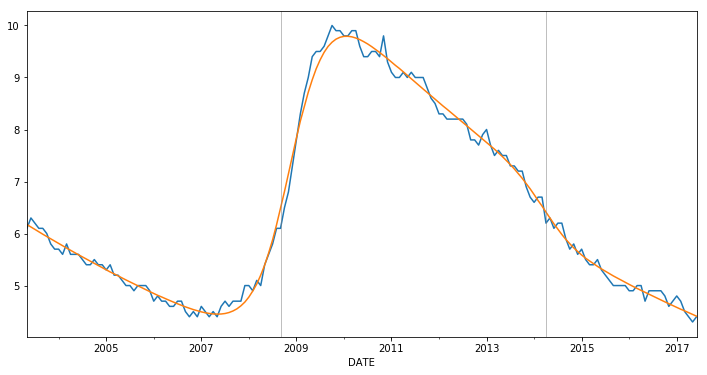

In [5]:
unrate_df.UNRATE.plot()
unrate_loglinear.inverse_transform(unrate_df['unrate_loglinear_fit']).plot(figsize=(12,6))
print("Transition Centres:")
for t in unrate_loglinear_die.results['transition']:
    time = unrate_rt.inverse_transform(t)
    print(str(time))
    pl.axvline(time, color='0.5', linewidth=0.5)

print("Shock Width:")
for w in unrate_loglinear_die.results['width']:
    print(np.round(w,2))

print("Shock Magnitude:")
for m in unrate_loglinear_die.results['magnitude']:
    print(np.round(m))

Transition Centres:
2008-09-12 17:39:33.724800
2014-04-07 18:29:37.161599999
Shock Width:
-0.41
0.33
Shock Magnitude:
1.0
0.0


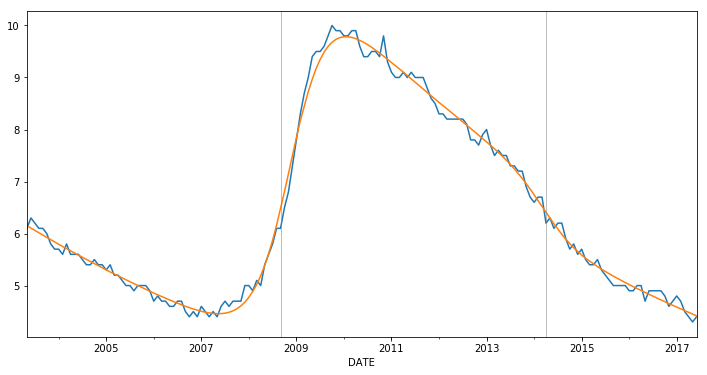

In [6]:
guesses = list()
guesses.append([1.0, -1.0, unrate_rt.transform("2008-1-1")])
guesses.append([0.1, -0.1, unrate_rt.transform("2014-1-1")])
unrate_global_die = skie.DynamicIE().fit(unrate_df.date, unrate_df.UNRATE, guesses = guesses, eq=True, guess_alpha=-0.09)
unrate_df["unrate_global_fit"] = unrate_global_die.predict(unrate_df.date, unrate_df.UNRATE)
unrate_df.UNRATE.plot()
unrate_df["unrate_global_fit"].plot(figsize=(12,6))
print("Transition Centres:")
for t in unrate_global_die.results['transition']:
    time = unrate_rt.inverse_transform(t)
    print(str(time))
    pl.axvline(time, color='0.5', linewidth=0.5)

print("Shock Width:")
for w in unrate_loglinear_die.results['width']:
    print(np.round(w,2))

print("Shock Magnitude:")
for m in unrate_loglinear_die.results['magnitude']:
    print(np.round(m))